# Week 7 - Data Science

## Drill

__Exercise:__ Write a function `hasvowel()` which accepts a word input and returns `True` if the word contains vowels. Think about the requirements of the argument and raise them if incorrect. `string.alpha()` might be helpful. 

In [ ]:
# Solution
import string   # or from string import isalpha

'''
If the argument is not a word (i.e. with spaces or non-letter character/ not a string), then raise ValueError. 
'''
def hasvowel(word): 
    if type(word) != str: 
        raise ValueError
    # Check spaces and non-letter character
    if word.isalpha() == False: 
        raise ValueError
    
    if ('a' or 'e' or 'i' or 'o' or 'u') in word:
        return True   # Otherwise you will obtain False already
        

In [ ]:
# Your code below


__Exercise:__ In the following, print out the results (__in 2 decimal points__) using the `.format()` method. The computation is given to you. 

In [7]:
# Solution
from random import randint
result = randint(0,122)/100

print('{0:.2f}'.format(result))

1.04


In [ ]:
from random import randint
result = randint(0,122)/100

# Your code below


__Exercise:__ Design a pandas dataframe which has the following specification. 
* `id`: Integers of 8 digits, starting by `10000000`.
* `name`: String characters.

After this, run your code and show the first 5 records of the dataframe you have created. 

In [7]:
# Solution
import pandas as pd
df = pd.DataFrame({'id':[10000000,10000001,10000002,10000003,10000004],'name':['Shelly','Kent','Martin','John','Myra']})
print(df.head(5))

         id    name
0  10000000  Shelly
1  10000001    Kent
2  10000002  Martin
3  10000003    John
4  10000004    Myra


In [ ]:
# Your code below


## Data Science Process

From this week, we will head into data science. Data science is a process to analyse data and extract meanings out of it. Unlike data analytics, data science adds one layer which is to __build a model__. This week we will look into 
* The first few steps on data science, which constitute most of the data analytics process. 
* Give a practical exercise on building skills on preparing data. 

Note that this week we are using a range of examples that you may find bit confusing. In reality not all skills has to be required in all data analytics project. Often some area requires this skills but not others. That is why we employ examples from different areas. 

In data analytics, there is a standard procedure where data scientists follow to commit a data science project. This is called __CRISP-DM__. It follows from generating the ideas, finding the ingredients to produce a data science product and report them. The following is the flowchart of the process. 

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url="fig/CRISPDM_Process_Diagram.png", width=540)

# Image from https://www.datasciencecentral.com/profiles/blogs/crisp-dm-a-standard-methodology-to-ensure-a-good-outcome

## Setting Your Goal

In the first phase, the organisation understands the project objectives and the business requirements. Often they will summarise them in documents. This is the __business understanding__ phase. This is not contrainted to business, any organisation or __you__ have a goal, and this goal is where it guides you to the road of data analytics. 

__Exercise:__ Think about in your career, what is your objective? Think about how this object require data to help you. 

## Data Understanding

To start the data science project, we need to start with the relevant data sources. This is part of the __data understanding__ process. This involves the following steps: 
* Sourcing data
* Exploratory data analysis (EDA)
* Data cleaning

### Sourcing Data from Twitter

Twitter is a popular social media site where users can express themselves within some text length. It attracts a lot of attention from researchers to understand how opinion forms on Twitter. To convenient people understand what is inside the social network, Twitter offers an API that allows us to obtain the information in their server. 

API is the gateway to their servers. This means we need to obtain a key to get access. This is called the __public-key cryptography__. Which means we use the public key to get access into Twitter's server, and Twitter has a private key to encrypt their message back to us. This is only important when we are using the pair of keys as in below. 

So before to start anything, we should have a Twitter developer account beforehand. This can be obtained from [https://developer.twitter.com/](https://developer.twitter.com/). 

After that, you will need to obtain your __consumer keys__ and __access tokens__ (i.e. the public keys) on the developer portal. There are many guides available online, for example
* [https://towardsdatascience.com/how-to-access-twitters-api-using-tweepy-5a13a206683b](https://towardsdatascience.com/how-to-access-twitters-api-using-tweepy-5a13a206683b)
* [https://realpython.com/twitter-bot-python-tweepy/#creating-twitter-api-authentication-credentials](https://realpython.com/twitter-bot-python-tweepy/#creating-twitter-api-authentication-credentials)

Once you have created an application, you will need Twitter officially approve you. This can take from hours to few days. 

To fetch tweets from Twitter, we get help from the `tweepy` package. The following code is would fetch the relevant tweets to the keyword `'pokemon'` (last line of the snippet). 
```python
import tweepy

APP_KEY = '***'
APP_SECRET = '***'

auth = tweepy.OAuthHandler('***', '***')
auth.set_access_token(APP_KEY, APP_SECRET)

api = tweepy.API(auth)

tweets = api.search(q = "pokemon", count = 100, result_type = "recent")
```
As you can see, we use 2 pairs of keys. The `APP_KEY` represents our access to the server, and then we access the session token which allows us to stay for the time being.  

`tweepy` provides a lot of methods that could enable programmers to obtain relevant tweets. For example the `search()` method returns relevant tweets from a keyword. `search_users()` returns relevant users from a keyword. 

More of these methods, and how to use them, can be find in [https://tweepy.readthedocs.io/en/latest/api.html](https://tweepy.readthedocs.io/en/latest/api.html). 

__Exercise:__ What does each line of the code mean? If possible, copy the snippet and comment out each lines. 

In today, we are going to fetch some of the tweets and write them in json format. Json is a way to store complex data in text files and the program can recognise them afterwards. In python there is a native package called `json`, so we will call them at the start. 
```python
import json
```
To convert the information to json, we write 
```python
tweet_json = json.dump(tweets._json)
```
Thus we will need to store the data, this means we can write 
```python
with open('tweets.json', 'w') as json_file:
    json.dump(tweet_json, json_file)
```
and the tweet data is now stored in `tweets.json` in your current folder location. 

To read back the json file, we can use the following snippet: 
```python
with open('data.txt') as json_file:
    data = json.load(json_file)
```

__Exercise:__ Write a code that will return tweets with the keyword `'Apple'`. Store them into the file called `apple_tweets.txt'. 

In [ ]:
# Solution
import tweepy

APP_KEY = '***'
APP_SECRET = '***'

auth = tweepy.OAuthHandler('***', '***')
auth.set_access_token(APP_KEY, APP_SECRET)

api = tweepy.API(auth)

tweets = api.search(q = "Apple", count = 100, result_type = "recent")

with open('apple_tweets.txt', 'w') as json_file:
    json.dump(tweets, json_file)

In [ ]:
# Your code below


As an extension, you can use a Twitter scraper to do more complex scraping. Given that one method call can fetch up to 1500 tweets, you can write a code to find tweets within a date range, and return more than 3200 at once. There are many of these online and often the authors have submitted theirs on thei Github repository. 

### Web Scraping

Internet contains a wealth of resources, so we can use python to extract information from the webpage. To scrape from the internet, we follow the following steps: 
1. Find the page that you want to scrape
2. Inspect the page
3. Write the code
4. Run the code and extract the data
5. Store the data in the required format 

In this exercise, we will try to scrape from news website. Our example would be from [https://www.nbcnews.com/better/health/what-headline-stress-disorder-do-you-have-it-ncna830141](https://www.nbcnews.com/better/health/what-headline-stress-disorder-do-you-have-it-ncna830141). Which we wish to obtain the article itself. 

This means we should have a look at the page itself, by means of clicking in the link and inspect them. You should see the similar screenshot as below. 

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url="fig/Capture01.PNG", width=620)

You will see the webapage and it has not only just the news article itself. In well structured websites, there is a top bar to navigate to other pages of the news site. Often there will be some advertisements at the side of the article. If you scroll down, you will see the footer which shows the side information of the website as well. The article does not span the whole space in the middle of the page. There are spaces to put the author's information and the date of publish. 

__Exercise:__ Identify the page elements in the link. 

Our first step is to fetch the webpage onto our computer. In this way, we could potentially extract the information from the page. In this exercise, we will look at a package called `requests`. The following is the snippet of code to extract the website and export the information. 

```python
import requests

htmlsource = requests.get('https://www.nbcnews.com/better/health/what-headline-stress-disorder-do-you-have-it-ncna830141').text
tree = html.fromstring(htmlsource)

with open('file/stress_news.html', mode = 'w') as fo:
    fo.write(htmlsource)

fo.close()
```

To extract the contents, there is a method to do so. Webpages are composed under a markup language called HTML. Each semantic contents are wrapped by a tag. For example, to make text bold, we can write `<b>I am bold.</b>` wich shows __I am bold.__ The bold find starts at the `<b>` tag and ends at `</b>` tag. A typical webpage should show 
```html
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN"
   "http://www.w3.org/TR/html4/strict.dtd">
<html>
   <head>
      <title>My first HTML document</title>
   </head>
   <body>
      <p>Hello world!</p>
   </body>
</html>
```
Let us look at the tags in more detail: 
* The first line tells the computer that this is a webpage. 
* The `<head>` tag shows the meta information of the webpage. In this case, we define the title of the page under the `<head>` tag. 
* Anything showed in the `<body>` tag will appear on the screen (of your browser). In this case, there is a sentence 'Hello world!' is written and it is wrapped by the paragraph `<p>` tag. 
* Finally, every tags should wrap up by a end tag that starts with a `/`. For example, a paragrapha ends with a `</p>` tag. 

We cannot assume that our contents are spans within the whole `<body>` tag, so we will inspect it. To do so, at the page opened press __F12__. You should see a portal appeared left to your page with the HTML markups showed. 

Then scroll to the HTML markups and scroll to the place where the article is highlighting. This is not the place contains only the article, but there is the smallest tag contained the article. So click on the triangle beside the tag, and scroll to where the article is highlighted again. Repeat this process until you are able to see only the article contents are highlighted. 

__Exercise:__ What is the HTML tag that contains the whole article? You may want to include all the information inside the tag. 

It is a `<div>` tag and the whole tag reads 
```html
<div class="article-body__content">
```

Once you read the tag that contains all the information of the article itself, you should see it contains several `<p>` tags, these mean the paragraphs and you don't need to care about them. 

To extract the article text, the HTML tag we have is important. If you do not have the answer, just use the solution from above exercise. We will extract the article using this information. Given we have the destination tag, how could we tell the computer where it is? We use a concept called __XPath__ (XML Path Language). It shows the address from the top most level to the tag we after. 

To get the XPath of the article, right click on the tag we after and click copy the 'XPath' or the 'Full XPath'. 

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url="fig/Capture02.png", width=480)

For example, the full XPath that stores the article itself is 
`/html/body/div[2]/div/div[5]/div/div/div/article/div/div[2]/div[1]/div[2]`, while the XPath is `//*[@id="content"]/div/div[5]/div/div/div/article/div/div[2]/div[1]/div[2]`. We can see that `html` appears at the start of the XPath, then the `body`. Which appears to be the nested structure of the html tags. 

Furthermore, 
* `/` seperates the different levels. For example, `/html/body/` means the top layer is the `<html>` tag and the `<body>` is nested.
* `[]` indicates which branch of the tree is chosen. For instance, if there are 2 `<div>` tags after `<body>`, `div[2]` would select the second (i.e. last) one.
* `//` means 'arbitrary depth'. For example, `/html/body//p` means any paragraphs `<p>` under `<body`. Trilling (2019) adivses to 'start your XPATH with `//` to avoid make it shorter and avoid being too specific'.
* `*` means 'everything'. For instance, `p[*]` means all paragraphs. 
* `//*` means everything in the next layer. 
* `[@attribute="whatever"]` lets you select only those tags that contain a specific attribute. Common attributes could be `id`, `class`. Using above exercise as an example, if the `<div>` tag reads `<div class="reviews-single text">`. The XPath could write 
`//div[@class="article-body__content"]`. 
* `.` (a dot) means relative location path from the tag we after. 

This means we can fetch (or _parse_) the article by specifying the XPath. Which is done by the following code snippet. 
```python
from lxml import html

article_content = tree.xpath('//*[@id="content"]/div/div[5]/div/div/div/article/div/div[2]/div[1]/div[2]')

article_content_text = [r.text.strip() for r in article_content]
print(article_content_text)
```

__Exercise:__ Use the snippets above to print out the texts of the article. If possible, write the texts into a `.txt` file. 

__Exercise:__ Use the snippets above to extract the positive words in the Havard IV-4 dictionary. After that write the list of words into a `.txt` file. 

This is the link: `http://www.wjh.harvard.edu/~inquirer/Pstv.html`

## EDA

_Some of contents come from https://github.com/info-370/eda._

Exploratory data analysis (__EDA__) is the process to understand the datasets sourced. This process starts by summarising the data structures and then visualise a selected features to quickly understand univariate distributions and relationships between variables. Initial EDA questions ask basic questions, including:

* How large is the dataset (rows, columns)?
* What are the variables present in the dataset?
* What is the data type of each variable?

At the end, the goal of EDA is to find 
* statistical summary of individual columns. 
* the relationship between columns. 
* check if any missing data. 

In this week, we will start some work on EDA with a marks dataset and a text dataset. This will use either statistical analysis and/ or visualisations. You can source your own dataset after this class. 

When using Jupyter to analyse data, we should maintain our habit on grouping each functions into each cell. For example, a conventional layout should include (in order): 
1. Packages/ libraries needed to be imported
2. Custom functions you wish to use
3. Import data
4. EDA (and data cleaning, may separate)
5. Analysis
6. Report on your findings

In this way it is organised, and also it is intuitive to later users to compile the early cells first so that there will be no not found errors. In the following, we have a dedicated cell for storing the packages. When we need to import a library, we will add into the next cell and rerun it. 

In [ ]:
# Import all needed packages in here
import numpy as np
import pandas as pd




In this exercise, we will use a sample marks data set called `marks.csv`. It is stored in the `/files` folder. It is generated dataset where it simulates the breakdown of marks in a course. There are several columns: 
* Unikey is a unique identifier of each students. 
* Final exam marks (by question, worth 50%): 
    * `'Q1'` is out of 20.
    * `'Q2'` is out of 20.
    * `'Q3'` is out of 15.
    * `'Q4'` is out of 20.
    * `'Q5'` is out of 15.
    * `'Q6'` is out of 10.
* `'Quizes'` worth 10% of the course. 
* `'Lab'` worth 10% of the course. 
* `'Asgn 01'` worth 10% of the course. 
* `'Asgn 02'` worth 20% of the course. 

__Exericse:__ Read the `marks.csv` file and import the data as a `pandas` dataframe. 

In [ ]:
# Your code below
df = pd.read_csv('???')

Sometimes the input `.csv` file is encoded by different systems. For example, if the `.csv` file is written in Chinese or other languages, it may use unknown encoding systems to us. Sometimes, we need to add an option to the `.read_csv()` to let it read the Unicode. For example, 

```python
df = pd.read_csv('???', encoding='utf8')
```

If you see the encoding error and you cannot figure out which encoding system it uses. Run the following code and it will help you. Then use the code snippet above. 

In [ ]:
# This code checks what encoding the csv file has. 
with open('top50.csv') as f:
    print(f)

In this exercise, we don't need to worry about the encoding. 

So let us start exploring the data set. This means we need to print out the features inside the dataset. In the following, we are using the methods from `pandas` since last week. Which would be familiar to you. 

__Exercise:__ How can we see the first __10 records__ of the dataset?

In [4]:
# Solution
print(df.head(10))

     unikey    Q1    Q2    Q3    Q4    Q5    Q6  Quizes     Lab Asgn 01  \
0  pmpk3028   6.0   8.5   2.5   3.0   7.0   5.0   3.47%   3.27%  84.27%   
1  iyqw3940  16.5  18.5   1.0  14.0  14.5   8.0  14.08%  91.72%  56.11%   
2  mjll6065  11.5  11.5   0.5  14.5  11.0   0.0  84.66%   75.5%   48.3%   
3  rtgm8060   6.0  14.5   5.0   8.0   7.0   0.0  59.99%   52.2%  19.31%   
4  xfxd8275  12.0   4.0   1.5   3.5  14.5   6.0  23.46%  78.64%   2.32%   
5  usan5260   1.5  18.0   4.5   7.5   8.0   2.5  11.53%  33.07%  53.54%   
6  exgv5076   5.5   7.0   2.0  13.5  10.0   9.5  21.71%   1.31%   56.8%   
7  dprj4333   1.5  20.5  10.0  13.0   1.5  10.0  76.35%  41.73%  27.52%   
8  vera2617   4.5  15.0  11.0   1.0   5.5  10.5   69.2%  13.23%  30.51%   
9  fuea3500   4.5  13.5   5.0   1.5   4.5   6.5  74.32%  96.75%  87.45%   

  Asgn 02  
0  50.17%  
1   8.78%  
2  98.73%  
3  90.93%  
4  91.49%  
5  49.17%  
6  89.46%  
7  84.06%  
8  30.62%  
9  13.52%  


In [ ]:
# Your code below


__Exercise:__ How can we know what columns are in the data set?

In [ ]:
# Solution
print(df.columns)

In [ ]:
# Your code below


__Exercise:__ How can we find out how many rows and columns we have?

In [8]:
# Solution
print(df.shape)

(250, 11)


In [ ]:
# Your code below

__Exericse:__ Given that we know how to find how many rows and columns we have in teh dataset? I would like to see the results printed as `'There are {} records and {} columns in this dataset.'` where the brackets are substituted by the number of rows and columns in the dataset. 

__Hint:__ Use the code above and think about how come the returned value able to fit in 2 values. What is the data type we obtained? So how can we extract the individual values? 

In [5]:
# Solution
print('There are {} records and {} columns in this dataset.'.format(df.shape[0],df.shape[1]))

There are 250 records and 11 columns in this dataset.


In [ ]:
# Your code below


__Exercise:__ How can we find out the data types under each column? Are they all the same under each columns?

In [ ]:
# Solution
print(df.dtypes)

In [ ]:
# Your code below


At the end of your EDA, we will start to get some statistical information from the dataset. To do so, we rely on the native `.describe()` method from `pandas`. Run the code below to see how the amrks distribution would be. 

In [ ]:
# Run this code
df.describe()

So let us start with the results row by row. 
* The first column tells us how many (non null) records do we have in this dataset. Given that all counts are the same, we can say there are no missing (null) values. However, we can check that from the `.shape()` method previously. 
* The next 2 rows represents the mean and standard deviation of each questions. It would be meaningful to interpret these results given we have the total marks of each question. 
* The next rows represent their quantiles. That is, for example, how does the lowest 25% perform? We can have a percetion on where the cohort perform. Are they doing good in this question, or not?

However, if we look at the last row. There is something wrong in here. If you look carefully, you should see that the maximum marks are 0.5 more than what supposed to be. We need to find out how many people have this mark and then rectify the situation. This will be done in the next section. 

## EDA: Visualising Data

In EDA you will need to show your results. It can be either summarising the statistics, or visualisaing data. In this wee, we will look into few common visualisations: 
* Histogram
* Scatter plots
* Pairwise plots

In visualising data we use `pyplot` from `matplotlib` to show the visualisations. In this course we may use other packages such as `seaborn`. Often the `matplotlib` is used as a wrapper of the extra functionalities from these libraries and we will use the following format to visualise data 
```python 
import matplotlib.pyplot as plt 
import seanborn as sns 

plt.figure()  # Creating the figure objects, the visualisations are inside 
'''
Any visualisations e.g. plt.plot() or plt.hist() in here 
'''
plt.show() # Otherwise your visualisation will not show
```

To recap, the above code has $3$ steps: 
1. Use `plt.figure()`
2. Insert any visualisation methods after this 
3. Use `plt.show()`

The first one to here is histogram, which is a type of visualisation where data are represented as bars. Often histogram are used to represent the counts of unique data values or its frequency (or probability). The following shows what this means. 

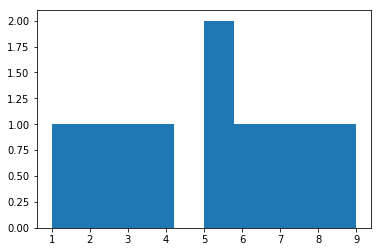

In [2]:
import matplotlib.pyplot as plt 

hist_data = [1,2,3,4,5,5,6,7,8,9]

plt.figure()
plt.hist(hist_data)
plt.show()

As you can see, $5$ repeated twice and therefore it shows the bar height taller than others. 

You can see that the `hist()` method from `pyplot` has an optional argument which allows to show the density instead. This is done by using the `density` argument. 

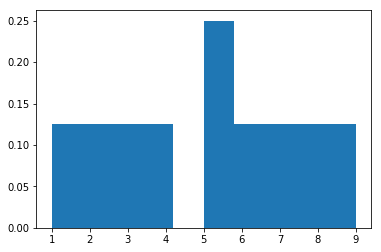

In [3]:
import matplotlib.pyplot as plt 

hist_data = [1,2,3,4,5,5,6,7,8,9]

plt.figure()
plt.hist(hist_data, density=True)
plt.show()

As you can see that the heights are the same as before, but look carefully at the $y$-axis and you can see that they are less than 1. However, you should found that the frequency of $5$'s should be $0.2$ and others should be $0.1$ instead. The reason why this happens is because the `density` argument changes the $y$ values so that the area of the histogram is $1$. We can use `histplot()` from `seanborn` to visualise the density instead. 

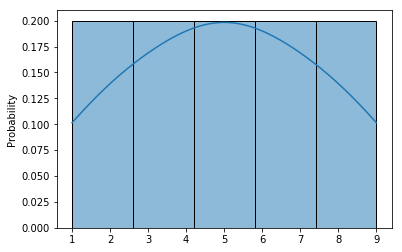

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns

hist_data = [1,2,3,4,5,5,6,7,8,9]

plt.figure()
sns.histplot(hist_data, stat='probability', kde=True)
plt.show()

To get the correct probability values, we need to ensure that each data values belongs to each bar. This is set by the `bins` argument. Bin in statistics are the range of data values bunch together. For example, often we see age brackets and this is an example of statistical bins. 

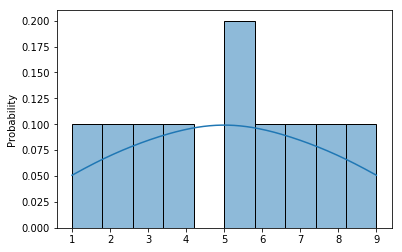

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns

hist_data = [1,2,3,4,5,5,6,7,8,9]

plt.figure()
sns.histplot(hist_data, bins=10, stat='probability', kde=True)
plt.show()

So now you can see that by setting more bins, the visualisation looks more detailed. 

The next type of plot is scatter plot, where data points are represented by dots. This time we use the `scatter()` method from `pyplot` to visualise them. Using the previous example, we have 

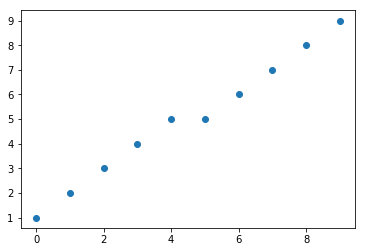

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

hist_data = [1,2,3,4,5,5,6,7,8,9]

plt.figure()
plt.scatter(np.arange(len(hist_data)), hist_data)
plt.show()

If you carefully inspect the code above, you can see the `hist_data` spans on the $y$-axis. The value of $x$-axis is not granted but you have to specify what each $x$ values would be. If in this occassion that the data represents order, then we can use `numpy` to generate a sequence of integer array as the $x$-axis values, using `np.arange()`. 

Usually when we know the $x$ values then they should be stored in a separate list or array from the $y$ data. 

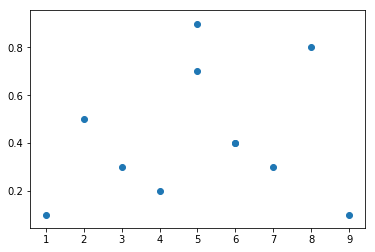

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

scatter_x = [1,2,3,4,5,5,6,6,7,8,9]
scatter_y = [0.1,0.5,0.3,0.2,0.7,0.9,0.4, 0.4,0.3,0.8,0.1]

plt.figure()
plt.scatter(scatter_x, scatter_y)
plt.show()

Now we have explored most of the data set. We will start find the correlations between different datasets. 
```python
import seaborn as sns
sns.set(style="ticks")
```

In [ ]:
sns.pairplot(df)

## Data Preparation: Data Cleaning and Other Tools

_Some of contents come from https://github.com/DataScienceUB/introduction-datascience-python-book/blob/master/ch03_Descriptive_Statistics.ipynb. _

After EDA has proceed, we will realise our dataset has many issues. This then involves data cleaning means to find out the outliers, for example 
* Which data points has value too big?
* Which data points are ilogical?
* How many missing data do we have?

The most common steps are:

* __Sample the data__ We will need to extract part of the dataset to train our model, often this has to be done where there is a large dataset. 
* __Impute missing data__ It is quite common that some of the input records are incomplete in the sense that certain fields are missing or have input error. In a typical tabular data format, we need to validate each record contains the same number of fields and each field contains the data type we expect. In case the record has some fields missing, we have the following choices:
    * Remove the row if it is imposible to impute them. 
    * Infer the missing value based on the data from other records. Usually it could be either average, or the median (e.g. if skewed). 
* __Remove duplicate data__ Clerical errors may arise some rows to have duplicated information. We need to detect them and remove them. 
* __Inconsistent data__ By business knowledge, experts may inspect which datasets are incorrect. For example they may found incorrect data which values exaggerately large. This is undetectable by computer itself. 
* __Normalise numeric value__ Transform numeric data into a uniform range is good for training them into machine learning model.
* __Reduce dimensionality__ We often want to capture the essense of the dataset, or sometimes it is because the machine learning method prefer simpler datasets. Commonly we can use Principal component analysis (PCA) to do this.
* __Add derived features__ In some cases, we may need to compute additional attributes from existing attributes (e.g. linear transform temperature between scales, converting a geolocation to a postcodes). 
* __Binning numeric value (into categories)__ For numeric attributes, a common way to generalize it is to bin them into ranges, which can be either constant width (variable height/frequency) or variable width (constant height). 
* __Convert categorical variables into binary variables__ Some machine learning models only take binary input (or numeric input). We may convert the catagorical variables into multiple binary variables (i.e. true and false). Where each label in the catagorical variable is encoded as binary variables for each label.  
* __Select, combine, aggregate data__ This includes select which columns are relevant for the model, combine the columns or aggregating multiple raw data records along some dimensions. Often this happens at the end of the EDA and before we finalise which columns should go to our machine learning model. This usually aims to boost our model quality. 

In the following, let us use some of the templates to clean the dataset.

From previously, we have found out that few people who had more marks than expected. To find out the how many people have this problem, we use the following code: 

In [ ]:
print('=== Excessive marks awarded ===')
print('Q1:',df.loc[df.Q1 == 20.5, 'Q1'].count(), 'students')
print('Q2:',df.loc[df.Q2 == 20.5, 'Q2'].count(), 'students')
print('Q3:',df.loc[df.Q3 == 15.5, 'Q3'].count(), 'students')
print('Q4:',df.loc[df.Q4 == 20.5, 'Q4'].count(), 'students')
print('Q5:',df.loc[df.Q5 == 15.5, 'Q5'].count(), 'students')
print('Q6:',df.loc[df.Q6 == 10.5, 'Q6'].count(), 'students')

How would you able to diagnose the problem? Think about a cause of this incorrect data entry and write a code to see why. 

The reason why this happens is becuase when this dataset was generated, it was based on a code that aimed to generate `0.5` marks. However, this will cause the the problem above. 

In [ ]:
# Your code below


We know that not many people have this problem, that is fine. For the purpose of this exercise, let us convert the marks into full marks. This is the code to do that. 

In [ ]:
df.loc[df.Q1 == 20.5, 'Q1'] = 20
df.loc[df.Q2 == 20.5, 'Q2'] = 20
df.loc[df.Q3 == 15.5, 'Q3'] = 15
df.loc[df.Q4 == 20.5, 'Q4'] = 20
df.loc[df.Q5 == 15.5, 'Q5'] = 15
df.loc[df.Q6 == 10.5, 'Q6'] = 10

Can you explain what does the code mean? You might need to see the `.loc` documentations in `pandas`. 

So now we have corrected the illogical data, and let us see how is the dataframe behaving. 

In [ ]:
# Run it
print('=== Excessive marks awarded ===')
print('Q1:',df.loc[df.Q1 == 20.5, 'Q1'].count(), 'students')
print('Q2:',df.loc[df.Q2 == 20.5, 'Q2'].count(), 'students')
print('Q3:',df.loc[df.Q3 == 15.5, 'Q3'].count(), 'students')
print('Q4:',df.loc[df.Q4 == 20.5, 'Q4'].count(), 'students')
print('Q5:',df.loc[df.Q5 == 15.5, 'Q5'].count(), 'students')
print('Q6:',df.loc[df.Q6 == 10.5, 'Q6'].count(), 'students')

There is another illogical data occured in the dataset. If you look carefully, the assessment marks (rightmost of the columns) are strings. These are stored as percentages and in strings. So we will need to carefully convert the pecentage into numbers by 
1. Strip the percentage sign away before we convert the data
2. Convert the data points using `.astype()`. 

So let us convert the columns in below. 

In [ ]:
# Complete the code and run it
df['Quizes Marks'] = df['Quizes'].str.slice(0,-1)
df['Quizes Marks'] = df['Quizes Marks'].astype(float)


### Missing Data

In reality, data is rarely clean and homogeneous. In particular, realistic datasets will have some amount of data missing. We will discuss how to treat missing data, discuss how `pandas` chooses to represent it. There are 2 ways in Python to represent missing data, either: 
* `None`, or 
* `numpy.nan` (acronym for _Not a Number_). 
The first one we know it from native Python coding, while the second one comes from `numpy`. They are both equivalent when we use a dataframe. 

Let us do an exercise about missing values. In the following, we use the marks database and, there are few students' marks that were added laterly. Run the code below to get a glimse of the new dataset (_Remember viewing the dataset itself it an important part of EDA_). 

In [ ]:
# Run it
new_data = pd.DataFrame([['qbis1318',15,18,0.5,0,0,0,'92.50%','100.00%','100.00%',None],['bzhe1028',3,5,0,0,7,0,'32.18%','0.00%','100.00%',None],['azha9208',2,0,5,0,0,0,None,None,None,None],['jwaj9208',5,8,11.5,5,1,0,'50.55%','25.18%','100.00%',None],['tbai9208',5,8,11.5,5,1,0,'72.63%',None,'100.00%',None]], columns=df.columns) 
print(new_data)

The missing data points occured because these students have few issues with administration. For the purpose of this exercise, we just work on the missing value through means of data analysis. Now let us add the dataset into the original one. 

In [ ]:
df = pd.concat([df, new_data], ignore_index=True)
print(df.head(15))

The first thing we should do is to detect how many missing values we have. In `pandas`, we have a method called `.isnull()`. Either one will return a Boolean mask over the data. For example, 
```python 
df2 = pd.DataFrame([[0.5,0,2,Null]])
df2.isnull()
```
will return 

```
0    False
1    False
2    False
3    True
dtype: bool
```
In the following, the code for inspecting how many null values are partially prepared. It is to count how many null values under each column. Think about what each method means and how they are applied in here. Complete the cell below to inspect all columns. 

In [ ]:
print('=== Null values ===')
print(df['unikey'].isnull().sum())
print(df['Q1'].isnull().sum())
print(df['Q2'].isnull().sum())
print(df['Q3'].isnull().sum())
print(df['Q4'].isnull().sum())
print(df['Q5'].isnull().sum())
print(df['Quizes'].isnull().sum())
# Continue the code below


The biggest problem of having missing data is therefore we cannot compute further. Often `pandas` methods do not like missing data and we will see an exception. So we will need to eliminate missing data. There are some operations still allow missing values, however, they will be "eaten" by the missing value. For example, try the following: 

In [ ]:
# Run this
1 + np.nan

or 

In [ ]:
# Run this
0 * np.nan

You will see that arithmetic operations are absorbed by the missing data. 

By rule of thumb, if the amount of missing data is less than 10%, then we should not be too worried of dropping them. In this exercise, we will not look at dropping rows too further. In `pandas`, the method to drop missing data is the `.dropna()`. For example, 
```python
df.dropna()
```
will __drop all the rows or columns__ that contains missing value. This will lead back to the original dataframe we have. 

In [11]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url="fig/MissingDataDrop.png", width=840)

The other option is to fill in the missing values. This will be the approach we pursue this time, so that each student will have a mark back. In `pandas`, the `.fillna()` method suits the needs. There are different approaches to do, here are the common appraoches: 
* Fill with `0`
* Fill using mean/ median value
* Bring in value from previous row (_forward-fill_)
* Bring in value from next row (_back-fill_)
* Based on values from the other column(s)

In this case, we will fill in the missing values will `0`. Which is, 

In [ ]:
# Try this
df.fillnan(0)

The other method of treating missing values is to __impute__ the missing values. This means the missing values are replaced by another value. It could be either
* Zeros (or a number)
* Mean, median, mean or random sample 
* Linear interpolation
* Regression (e.g. linear or logistic) 

In [10]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url="fig/MissingDataImpute.png", width=840)

The typical steps of imputing values in Python is to 

0. Generate a `SimpleImputer()` object from `sklearn.impute`. Assign a variable for this. 
1. Impute the missing values from a data frame (e.g. `df`) by 
    `imputer_df = pd.DataFrame(my_imputer.fit_transform(df))`
2. Bring back the column names by assigning the `.columns` attribute. 

__Exercise:__ How do you call the `SimpleImputer()` object. In particular, how do you import them from `sklearn`?

You should import them by 
```python
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
```

So the code to impute values should look like 
```python
from sklearn.impute import SimpleImputer

# Imputation
imputer = SimpleImputer()
imputed_df = pd.DataFrame(imputer.fit_transform(df))

# Put back column names
imputed_df.columns = df.columns
```

In practice, there are many ways to treat missing values. Either by dropping values or imputation, they are the main catgories. Often people only choose one approach, and there is a way to benchmark either methods. This is called the scoring method. In `sklearn`, there are methods to do so (e.g. `mean_absolute_error()`). 

We will talk about model evaluation in week 9. 

### Manipulating Datasets

In data science, understanding data initiates the project. It is important to foresee how the data will be important to the deliverables. In the next process __data preparation__, it involves with the following processes: 
* Deriving new columns
* Merging data sources

Remember the goal of data analysis is to explain something. Therefore, we need either __a target feature__ to explain or any quantitative features (e.g. how close the data points/ clusters). In this section, we will derive the marks column and infer from the that. Note that we will not merge data sources as we are working on only 1 data source at this point. 

To create a new column, we simply assign values to a column we have never seen from the data source. In particular, the marks breakdown of the course are: 
* Final exam marks  worth 50%of the course. 
* Quizes worth 10% of the course. 
* Lab worth 10% of the course. 
* Assignment 01 worth 10% of the course. 
* Assignment 02 worth 20% of the course. 

__Exercise:__ Create the `'Mark'` column. 

In [ ]:
# Solution
df['Mark'] = (df['Q1'] + df['Q2'] + df['Q3'] + df['Q4'] + df['Q5'] + df['Q6'])/2 + df['Quizes Marks'] * 0.1 + df['Lab Marks'] * 0.1 + df['Asgn 01 Marks'] * 0.1 + df['Asgn 02 Marks'] * 0.2
df['Mark']

In [ ]:
# Your code below

df['Mark']

Finally, we can visuallise the data points using `matplotlib` library. It is a Python library that presents our data visually. To call `matplotlib`, simply use the following line into our cell for calling libraries above
```python
from matplotlib import pyplot as plt
% matplotlib inline
```
You can see that we are importing a library `pyplot` from `matplotlib`, which is commonly used in data analytics. We then shortform the library called `plt`. The second line is unique line to Jupyter, which is to enable the plot outputs show and store in this notebook. 

The usual syntax of plotting data is the following: 
```python
plt.plot(data)
plt.xlabel('x')
plt.show()  # In Jupyter, it can be omitted if inline function used
```
Each lines above represents each part to plot a diagram. The __first line__ tells us what kind of plots to you want. `pyplot` provides several options to plot (e.g. box plot `plt.box()`, scatter plot `plt.scatter()`, line plot `plt.plot()`) data. The __second line__ is optinally for the bit and pieces (e.g. your axes label, how big is your plot) if your plot in the previous line. __Finally__, use `plt.show()` to display your work. 

There are plenty of exercises from their [official website](https://matplotlib.org/gallery/index.html). Click on one of the examples and there are many ideas come from the codes underneath the display. 

Let us do an example with `pyplot`, let us plot with a sample data. 

__Exercise:__ Complete the code below to plot a line plot. 

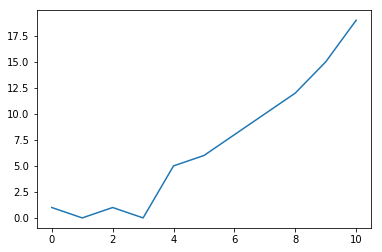

In [13]:
# Solution
from matplotlib import pyplot as plt
% matplotlib inline

plt_data = np.array([1,0,1,0,5,6,8,10,12,15,19])
plt.plot(plt_data)
plt.show()

In [ ]:
plt_data = np.array[1,0,1,0,5,6,8,10,12,15,19]
# Your code below


So now let us plot the marks of each student in the marks dataset. 

__Exercise:__ Plot the marks of each student using a scatter plot. What do the scatter plot mean? (Use `plt.scatter()` to help you)

In [ ]:
# Solution 
plt.plot(df['Mark'])
plt.show()
print('The scatter shows marks of each student, in the order of the dataframe rows.')

In [ ]:
# Your code below


Finally, let us plot the distribution of people who passed and failed the course. The following is the demonstration.

In [ ]:
# Run it 
plt.plot(df.loc[df.Mark >= 50, 'Mark'], 'bo')
plt.plot(df.loc[df.Mark < 50, 'Mark'], 'ro')
plt.show()

Can you explain what is in each line of code above?

## EDA with Text Files

In these 2 weeks we will also look at how to infer from text files. The key of analysing text data sets is to encode them quantitatively. 

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

news = pd.read_csv('files/news.txt', sep='\n', header=None)
print(news.head())

Our first analysis involves to find the length of each row. This is done by 

In [ ]:
# Run me
news[0].str.len()

Let us visualise the number of words in each line. To do that, we should make sure `matplotlib` and `pyplot` are imported. 

```python
from matplotlib import pyplot as plt
%matplotlib inline
```
The following code does the work. 

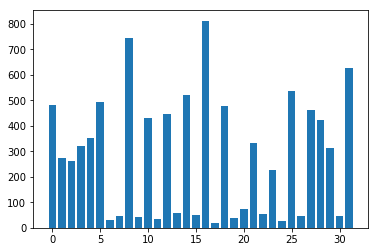

In [20]:
# Run me
plt.bar(list(range(news[0].shape[0])), news[0].str.len())
plt.show()

__Exercise:__ In the plot above, add a meaningful header for it. What is it about?

To explore our text files, one way is to understand how positive/ negative of the tone, and also how subjective is the piece of the text. This is called the __sentiment analysis__. `vader` in `ntlk` is a common library to proceed the sentiment analysis. To do so, you will need to download the vader lexicon (i.e. the dictionary). You will need to run this code 
```python
import nltk
nltk.download('vader_lexicon')
```
and delete the lines afterwards. Your computer has installed the `vader` lexicon and you won't need to use the code above again. 

After this, you are on your way to proceed with the sentiment analysis with `vader`. Which is done by the code below: 

In [6]:
# Run it
from nltk.sentiment import vader
senti=vader.SentimentIntensityAnalyzer()

The second line above is to create a sentiment analysis object, which is the place to analyse and store the results from sentiment analysis. You may wonder why there is no place to put the texts (inputs) above. The reasons is you will do this once you created the object itself. For example, see below: 

In [30]:
# Try yourself
print(senti.polarity_scores('I really love what I\'ve got!'))
print(senti.polarity_scores("I don't like this"))
print(senti.polarity_scores("I liked the course, but I don't like the bits and pieces of it."))

{'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.6989}
{'neg': 0.513, 'neu': 0.487, 'pos': 0.0, 'compound': -0.2755}
{'neg': 0.183, 'neu': 0.687, 'pos': 0.13, 'compound': -0.1938}


So let's apply the sentiment analysis into the text we after. 

In [7]:
ps = news[0].apply(senti.polarity_scores)

For example, we can find the negative score of the first row as 

In [40]:
ps[0]['neg']

0.09

__Exercise:__ Print the negative score of the $30$th row. 

In [8]:
# Solution
ps[29]['neg']

0.171

In [ ]:
# Your code below


__Exercise:__ Print the positive score of the $30$th row. What is your interpretation of this score?

In [9]:
# Solution
ps[29]['pos']

# The value is 0.0, it means the 30th row has negative content. 

0.0

In [ ]:
# Your code below


## Modelling

After all the preparation work has done, it is time to plan to make the deliverables. In data analytics, we make __models__. These are the mathematical models. You can think them as a line plot in front of the computer screen. A model is how we conceptualise a concept in a consise way. For example, 
* We describe how the population of birds grow in a nature reserve through a line plot through times.
* After we find out why the sewage system blocked in the whole city, we could draw a map of the sewage system to show the situation. 

So once we have our datasets on hand, we can start modelling. There are many ways to model from data: 
* Statistical modelling (See __next week__) 
* Machine learning (See __week 9 and 10__) 
* Dynamical equation modelling
* Agent based modelling

Usually statistical modelling means to find statistical information from a large dataset. These statistical information include mean, median mode values. Or range parameters such as standard deviation or interquartile range. By bringing the context of the data into the measured statistical information, we then conclude from them. 

Machine learning is set of methods which means the computer finds non-trivial patterns from data. Machine learning is a category of many computational methods, it depends on the dataset and your problem to decide which method is the best. You can check more from [Google](https://developers.google.com/machine-learning/problem-framing/cases) to find out more. More often, you don't need to use machine learning to model your dataset. There is a worksheet from Google to help you whether you need machine learning or not. 

[https://developers.google.com/machine-learning/problem-framing/framing](https://developers.google.com/machine-learning/problem-framing/framing)

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url="fig/MachineLearning.png", width=620)

At the end of your modelling process. You will need to evaluate your model. This will be mentioned more next week upon the technical sides. Often you will need to measure your model with __model diagnostics__. Therefore, you will able to ask yourself the following questions: 
* Does my model contribute to what I want?
* Is there any way to optimise my computation?
* Any surprises (both good and bad) occured when modelling?
* Any mistakes and lessons learnt?

Think about these questions once we have done next week's work. 

## Deployment

At the end of your data analytics cycle, you will be writing summary about your model and then use it in real life. There are many examples: 
* Recommendation systems on Youtube
* API for sports performance prediction 
* Animation of the spread of bushfires

While each dataset is unique, there is always possibilities to its applications. 

__Exercise:__ Think about what could be the applications from the data analysis we have just made. 

If you can't think of any applications on top of your head, that is fine. There are many ways to think about how to produce a useful application out of them. We call them as __deliverables__. In reality, people will: 
1. Summarise the results from their models
2. Create a step-by-step plan for deployment
3. You may then also wanted to see: 
    * Any factors or influences needed to follow up? 
    * Validity and accuracy of each model
    * Does the model become unrealistic?

After that you will need to write a final report to summarise your cycle. 

Before we finish, do you remember that in the CRISP-DM flowchart, what does the arrows look like? In fact, any business process is never uni-directional. Always remember to review your work. It will help you to detect any mistakes early as possible. 

## Conclusion

In this week, we have looked into the process of data analytics and 
* How to define a solid purpose for a data science project
* How to complete EDA
* Tools to conduct data cleaning
* Understand data analytics process

In the next weeks we will look into the other phases in the CRISP-DM: 
* Advanced EDA in week 8 
* Select and aggregate data in week 9 and 10
* Machine learning in weeks 9 and 10

## Further Reading

* Trilling, D. (2019). _Doing Computational Social Science with Python: An Introduction_. [Online; Accessed on 16th December 2019]
* Alvira Swalin (2018). 
[Different techniques on missing values treatment](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)